# Week 10 Handson

In this week, we will teach you how to implement regression model from-the-scratch. In this week, a mathematical derivation of regression will be carried in the class before hands-on. Then, you are expected to implement the final derivation formula into a python code.

#### Used Data 

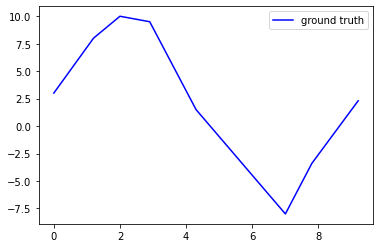

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

x =np.array([0,1.2,2,2.9,4.3,7,7.8,9.2]) # input of regression model
y = np.array([3,8,10,9.5,1.5,-8,-3.4,2.3]) # target (ground truth) 
                                           # of regression model

plt.figure("original data")
plt.plot(x,y,c='blue',label='ground truth')
plt.legend()
plt.show()

**Notes:** before you start to work on M01-M04, we want to inform that you may make usable fuctions, since they (M01-M04) are basically quite similar.

## Milestone (M01)
a. Make a linear regression model, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M01.a.<br>
c. Plot prediction output you get in M01.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [58]:
## Util function

def train_model(base_model, x, y):
    x = x.reshape((-1, 1))
    model = base_model.fit(x, y)
    return model

def display_graph(Y):
    global x, y
    plt.figure("Predicted Data")
    plt.plot(x, y, c='blue', label='ground truth')
    plt.plot(x, Y, c='red', label='prediction')
    plt.legend()
    plt.show()

In [59]:
# write code for M01.a here
from sklearn.linear_model import LinearRegression

model = train_model(LinearRegression(), x, y)
print("Score:", model.score(x.reshape((-1, 1)), y))
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Score: 0.41797354844574164
Coefficient: [-1.21964512]
Intercept: 8.10697401774398


In [60]:
# write code for M01.b here

Y = model.predict(x.reshape((-1, 1)))
display(Y)

array([ 8.10697402,  6.64339987,  5.66768378,  4.57000317,  2.8625    ,
       -0.43054183, -1.40625792, -3.11376109])

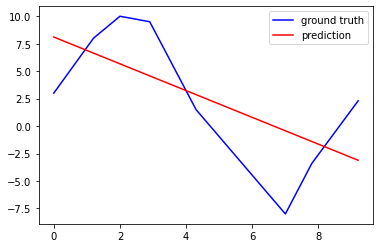

In [61]:
# write code for M01.c here

display_graph(Y)

## M02 (same with M01, but 2nd order polynomial)
a. Make a polynomial regression model with $order=2$, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M02.a.<br>
c. Plot prediction output you get in M02.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

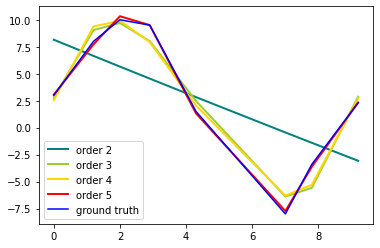

In [123]:
## Experiment

from sklearn.pipeline import make_pipeline

colors = ['teal', 'yellowgreen', 'gold', 'red']
lw = 2

for count, degree in enumerate([2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(x.reshape(-1, 1), y)
    y_plot = model.predict(x.reshape(-1, 1))
    plt.plot(x.reshape(-1, 1), y_plot, color=colors[count], linewidth=lw,
             label="order %d" % degree)

plt.plot(x, y, c='blue', label='ground truth')
plt.legend(loc='lower left')
plt.show()

In [116]:
# write code for M02.a here
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

model = train_model(PolynomialFeatures(degree=2), x, y)
model.get_feature_names()
coeff = model.transform(x.reshape((-1, 1)))
df_coeff = pd.DataFrame(coeff, columns=model.get_feature_names())
display(df_coeff)

model = LinearRegression().fit(coeff, y)
print("Score:", model.score(coeff, y))
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

,1,x0,x0^2
0,1.0,0.0,0.00
1,1.0,1.2,1.44
2,1.0,2.0,4.00
3,1.0,2.9,8.41
4,1.0,4.3,18.49
5,1.0,7.0,49.00
6,1.0,7.8,60.84
7,1.0,9.2,84.64


Score: 0.41799405070157525
Coefficient: [ 0.         -1.25379507  0.0036682 ]
Intercept: 8.149816209896084


In [117]:
# write code for M02.b here

Y = model.predict(coeff)
display(Y)

array([ 8.14981621,  6.65054433,  5.65689886,  4.54466005,  2.82632239,
       -0.44700757, -1.40661215, -3.07462213])

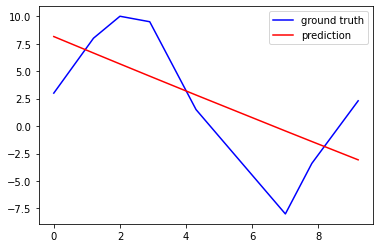

In [118]:
# write code for M02.c here

display_graph(Y)

## M03 (same with Q02, but 4th order polynomial)
a. Make a polynomial regression model with $order=4$, i.e., find linear regression coefficient $\mathbf{a}$ ($\mathbf{a}$ is notation used in the `Week11 - Pengantar Regresi.pdf`).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M03.a.<br>
c. Plot prediction output you get in M03.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and ground truth)

In [127]:
# write code for Q03.a here

model = train_model(PolynomialFeatures(degree=4), x, y)
model.get_feature_names()
coeff = model.transform(x.reshape((-1, 1)))
df_coeff = pd.DataFrame(coeff, columns=model.get_feature_names())
display(df_coeff)

model = LinearRegression().fit(coeff, y)
print("Score:", model.score(coeff, y))
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

,1,x0,x0^2,x0^3,x0^4
0,1.0,0.0,0.00,0.000,0.0000
1,1.0,1.2,1.44,1.728,2.0736
2,1.0,2.0,4.00,8.000,16.0000
3,1.0,2.9,8.41,24.389,70.7281
4,1.0,4.3,18.49,79.507,341.8801
5,1.0,7.0,49.00,343.000,2401.0000
6,1.0,7.8,60.84,474.552,3701.5056
7,1.0,9.2,84.64,778.688,7163.9296


Score: 0.9589206115731247
Coefficient: [ 0.00000000e+00  9.43468387e+00 -3.49267218e+00  3.19584309e-01
 -5.56615726e-03]
Intercept: 2.5436725723052396


In [128]:
# write code for Q03.b here

Y = model.predict(coeff)
display(Y)

array([ 2.54367257,  9.37654498,  9.90996756,  7.93154077,  2.03953591,
       -6.30140265, -5.30375782,  2.70389867])

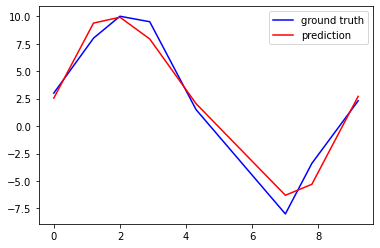

In [129]:
# write code for Q03.c here

display_graph(Y)

## M04 (same with M03, but with regularization)
a. Make a **regularized** polynomial regression model with $order=4$ and regularization constant $\lambda=0.5$ (find the regression coefficient $\mathbf{a}$).<br>
b. Calculate regression prediction using regression coefficient $\mathbf{a}$ you get in M04.a.<br>
c. Plot prediction output you get in M04.b together (in the same plot) with the ground truth. (Please put label/legend to differ plots of prediction and grount truth)

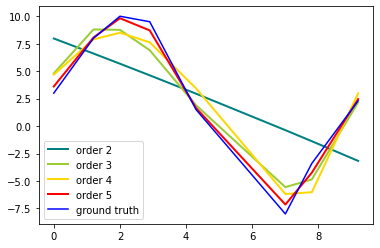

In [125]:
## Experiment

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

colors = ['teal', 'yellowgreen', 'gold', 'red']
lw = 2

for count, degree in enumerate([2, 3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.5))
    model.fit(x.reshape(-1, 1), y)
    y_plot = model.predict(x.reshape(-1, 1))
    plt.plot(x.reshape(-1, 1), y_plot, color=colors[count], linewidth=lw,
             label="order %d" % degree)

plt.plot(x, y, c='blue', label='ground truth')
plt.legend(loc='lower left')
plt.show()

In [132]:
# write code for Q04.a here

model = train_model(PolynomialFeatures(degree=4), x, y)
model.get_feature_names()
coeff = model.transform(x.reshape((-1, 1)))
df_coeff = pd.DataFrame(coeff, columns=model.get_feature_names())
display(df_coeff)

model = Ridge().fit(coeff, y)
print("Score:", model.score(coeff, y))
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

,1,x0,x0^2,x0^3,x0^4
0,1.0,0.0,0.00,0.000,0.0000
1,1.0,1.2,1.44,1.728,2.0736
2,1.0,2.0,4.00,8.000,16.0000
3,1.0,2.9,8.41,24.389,70.7281
4,1.0,4.3,18.49,79.507,341.8801
5,1.0,7.0,49.00,343.000,2401.0000
6,1.0,7.8,60.84,474.552,3701.5056
7,1.0,9.2,84.64,778.688,7163.9296


Score: 0.8988193739834741
Coefficient: [ 0.          2.36802674 -0.077303   -0.22313712  0.02182183]
Intercept: 5.20146731170023


In [133]:
# write code for Q04.b here

Y = model.predict(coeff)
display(Y)

array([ 5.20146731,  7.5914519 ,  8.19236113,  7.51995197,  3.6741359 ,
       -6.1520145 , -6.14758517,  3.02023147])

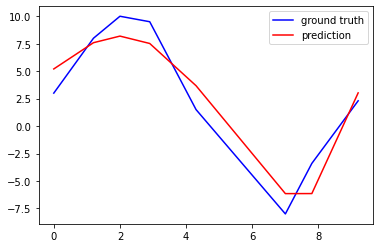

In [134]:
# write code for Q04.c here

display_graph(Y)